# 二叉树总结
#### 1. 二叉树的遍历（递归，迭代，层次）
#### 2. 二叉树的递归
#### 3. 二叉树的回溯
#### 4. 二叉搜索树（BST）
#### 5. 二叉树的生成
#### 6. 前缀树（待补充）
#### 主要参考
###### 1. [代码随想录](https://programmercarl.com/%E4%BA%8C%E5%8F%89%E6%A0%91%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80.html)
###### 2. [CS-Notes](https://github.com/CyC2018/CS-Notes/blob/master/notes/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E6%A0%91.md)

In [ ]:
## 二叉树的定义
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
## 链表的定义(lc109用到)
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

## 1. 二叉树的遍历

### LC.144 [二叉树的前序遍历](https://leetcode.cn/problems/binary-tree-preorder-traversal/description/)（递归方法）

In [2]:
class Solution:
    def lc144(self, root):
        res = []
        def traversal(node):
            if not node:
                return
            res.append(node.val) # 根节点
            traversal(node.left) # 左
            traversal(node.right)# 右
        traversal(root)
        return res

### LC.94 [二叉树的中序遍历](https://leetcode.cn/problems/binary-tree-inorder-traversal/description/)（统一迭代方法）

In [3]:
def lc94(root):
    res = []
    st = []
    if root:
        st.append(root)
    while st:
        node = st.pop()
        if node:
            # 因为使用栈，所以要按要遍历顺序的相反顺序
            # 右-中-左
            if node.right:
                st.append(node.right)
                
            st.append(node.val)
            st.append(None)   # 设置一个标志位，为了保持前中后序遍历的一致，解释参考代码随想录
            
            if node.left:
                st.append(node.left)
        else:
            node = st.pop()
            res.append(node)
    return res  

### LC.145 [二叉树的后序遍历](https://leetcode.cn/problems/binary-tree-postorder-traversal/description/)

In [4]:
## 前面两种方法都合适    

### LC.102 [二叉树的层次遍历](https://leetcode.cn/problems/binary-tree-level-order-traversal/)
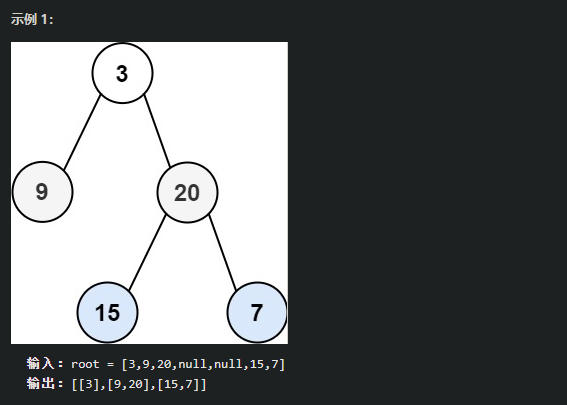

In [5]:
## 使用BFS模板
def lc102(root):
    if not root:
        return []
    deq = deque()
    deq2 = deque()
    res,result = [],[]
    deq.append(root)

    while deq:

        while deq:
            node = deq.popleft()
            res.append(node.val)
            if node.left:
                deq2.append(node.left)
            if node.right:
                deq2.append(node.right)
        while deq2:
            deq.append(deq2.popleft())
            
        result.append(res)
        res = []

        return result 

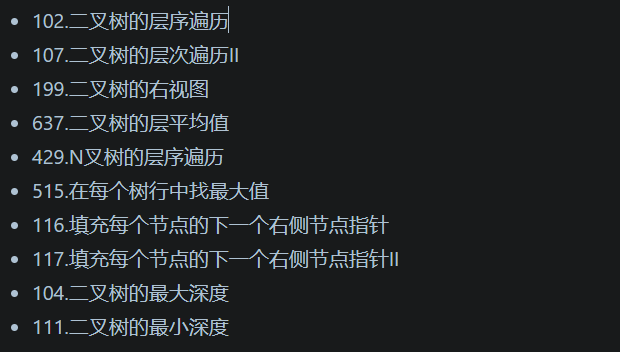

#### ##########################################我是分界线#################################################

## 2. 二叉树的递归相关

### LC.110 [平衡二叉树](https://leetcode.cn/problems/balanced-binary-tree/)
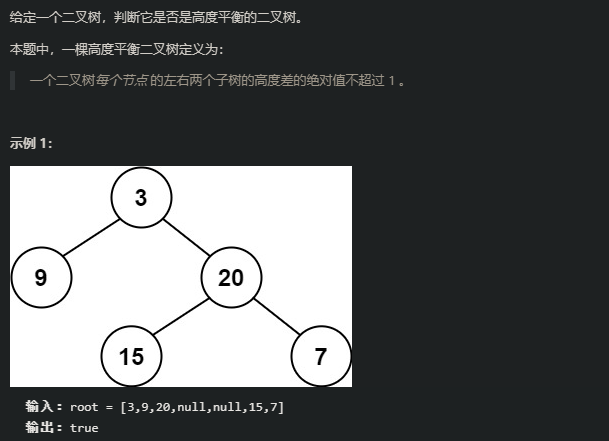

In [6]:
## 引入一个标志位-1，代表不是平衡二叉树的标志
def lc110(root):
    def traversal(node):
        if not node:
            return 0
        left = traversal(node.left)
        right = traversal(node.right)

        if left == -1 or right == -1:
            return -1

        if abs(left-right) > 1:
            return -1

        return 1 + max(left,right)

    res = traversal(root)
    return True if res != -1 else False

### LC.543 [二叉树的直径](https://leetcode.cn/problems/diameter-of-binary-tree/)
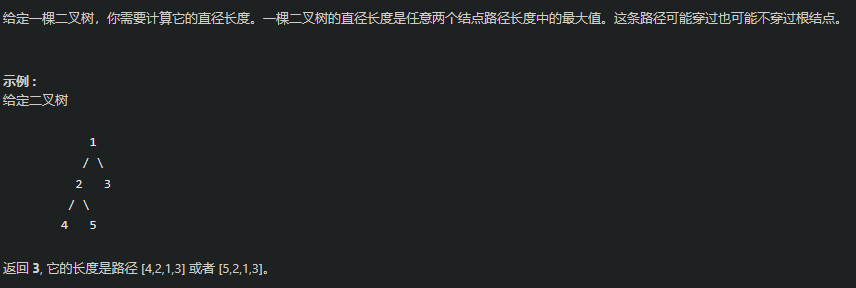

In [7]:
# 计算量变的每个节点的left和right的最大深度，相加就是直径（dog）
def lc543(root):
    res = 0
    def traversal(node):
        nonlocal res
        if not node:
            return 0

        left = traversal(node.left)
        right = traversal(node.right)

        if left + right > res:
            res = left + right

        return 1 + max(left,right)

    traversal(root)
    return res

### LC.226 [翻转二叉树](https://leetcode.cn/problems/invert-binary-tree/)
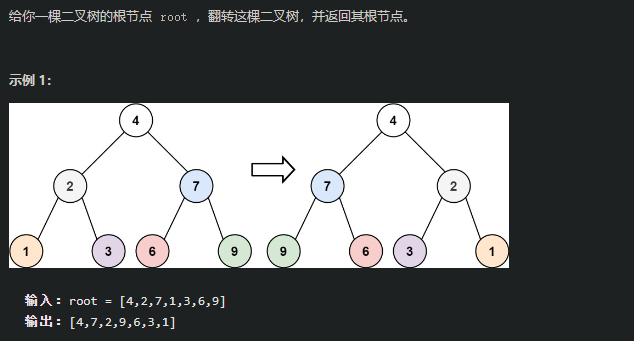

In [8]:
# 先序遍历，翻转每一个节点的左右孩子（遍历顺序不要错）
def lc226(root):
    def traversal(node):
        if not node:
            return
        node.left,node.right = node.right,node.left
        traversal(node.left)
        traversal(node.right)
    traversal(root)
    return root

### LC.617 [合并二叉树](https://leetcode.cn/problems/merge-two-binary-trees/description/)
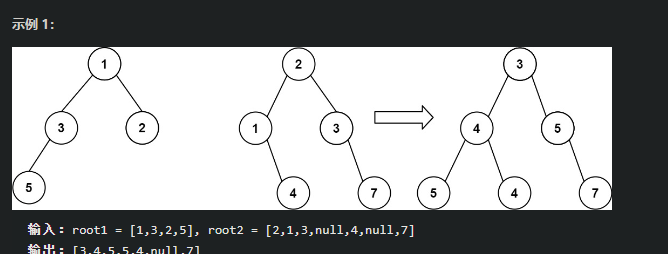

In [9]:
# 合并每个节点
def lc617(root1,root2):
    def traversal(node1,node2):
        if not node1 and not node2:
            return None
        if not node1 and node2:
            return node2
        if node1 and not node2:
            return node1
        
        # 新建一个节点
        node = TreeNode(node1.val+node2.val)
        node.left = traversal(node1.left,node2.left)
        node.right = traversal(node1.right,node2.right)
        return node
    return traversal(root1,root2)

### LC.572 [另一颗树的子树](https://leetcode.cn/problems/subtree-of-another-tree/)
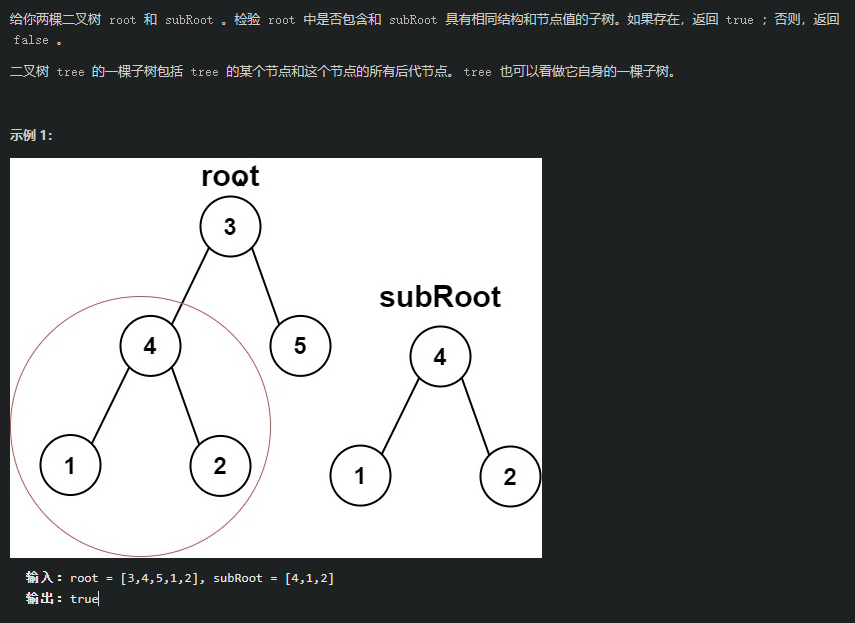

In [10]:
# 判断每一颗子树是不是subRoot
def lc572(root,subRoot):
    label = 0
    def issame(node1,node2):
        if not node1 and not node2:
            return True
        if not node1 and node2:
            return False
        if not node2 and node1:
            return False
        if node1.val != node2.val:
            return False
        return issame(node1.left,node2.left) and issame(node1.right,node2.right)

    def traversal(node):
        # print(node,subRoot)
        nonlocal label
        if issame(node,subRoot):
            label = 1
            return
        if not node:
            return

        traversal(node.left)
        traversal(node.right)

    traversal(root)
    return label == 1

### LC.101 [对称二叉树](https://leetcode.cn/problems/symmetric-tree/description/)
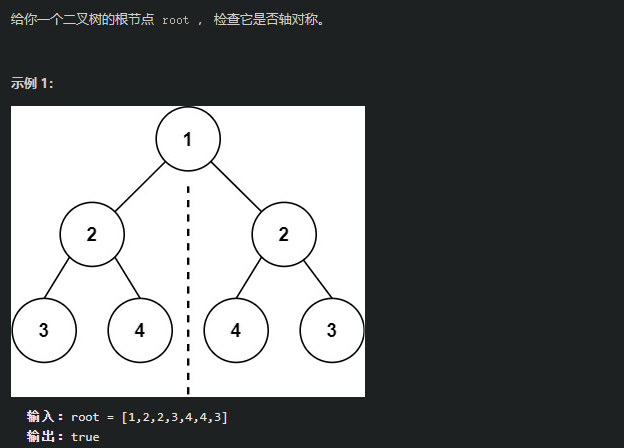

In [11]:
def lc101(root):
    if not root:
        return True
    def traversal(node1,node2):
        if not node1 and not node2:
            return True
        if not node1 and node2:
            return False
        if not node2 and node1:
            return False
        if node1.val != node2.val:
            return False

        return traversal(node1.right,node2.left) and traversal(node1.left,node2.right)

    return traversal(root.left,root.right)

### LC.404 [左子叶之和](https://leetcode.cn/problems/sum-of-left-leaves/description/)
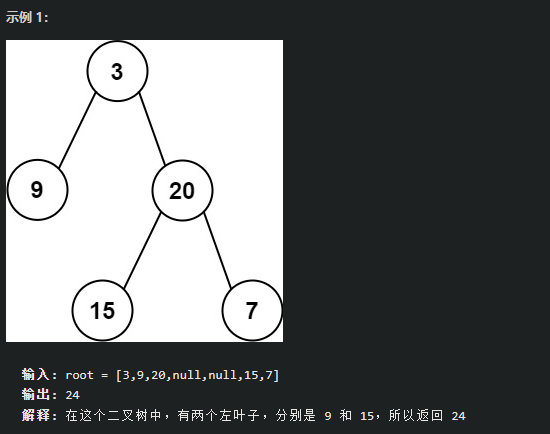

In [12]:
def lc404(root):
    ## 遍历，然后收集左子叶
    res = 0
    def traversal(node):
        nonlocal res
        if not node:
            return 
        if node.left and not node.left.left and not node.left.right:
            res += node.left.val

        traversal(node.left)
        traversal(node.right)
    traversal(root)
    return res

### LC.687 [最长同值路径](https://leetcode.cn/problems/longest-univalue-path/)
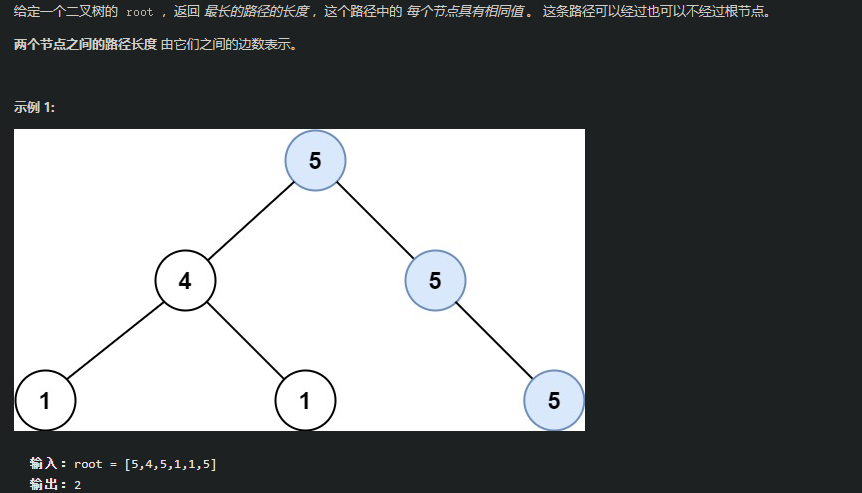

In [13]:
# 每个节点的返回值是“以这个节点为根的树有同值路径”
def lc687(root):
    if not root:return 0
    result = []
    def traversal(node):
        if not node:return 0
        # print(node.val)
        left = traversal(node.left)
        right = traversal(node.right)
        # print(left,right)

        num_left = 0
        if node.left:
            if node.val == node.left.val:
                num_left = left
        num_right = 0      
        if node.right:
            if node.val == node.right.val:
                num_right = right

        result.append(num_left+num_right)
        return 1 + max(num_left,num_right)

    traversal(root)
    print(result)
    return max(result)

### LC.337 [打家劫舍 III](https://leetcode.cn/problems/house-robber-iii/)
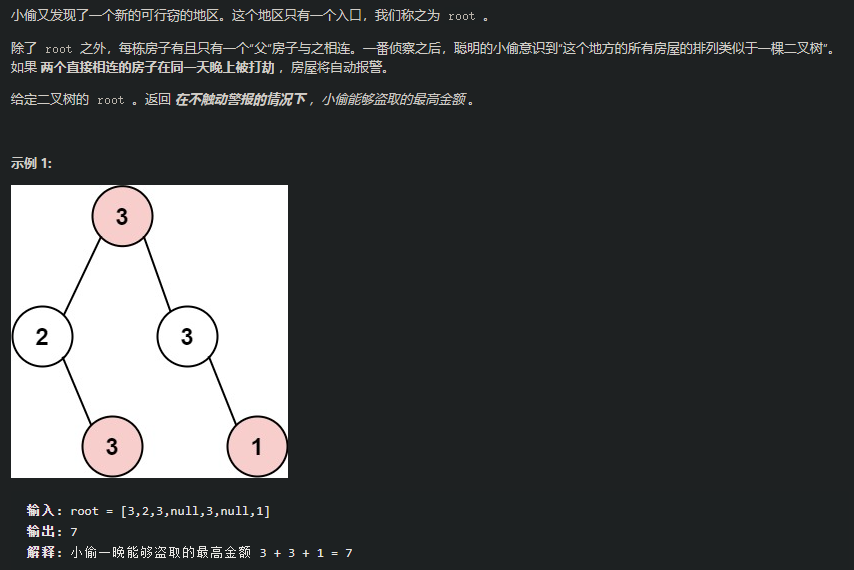

In [14]:
# 后序遍历，左-右-中不会出现不知到偷不偷后面的问题
# 动态规划:返回值代表【偷当前节点的收益，不偷当前节点的收益】
def lc337(root):
    result = self.get_rob(root)
    return max(result)

def get_rob(root):
    if root == None:
        return (0,0)
    left = get_rob(root.left)
    right = get_rob(root.right)
    # 偷当前节点，不偷子节点
    val1 = root.val + left[1]+right[1]
    # 不偷当前节点，可偷可不偷子节点
    val2 = max(left[0],left[1]) + max(right[0],right[1])
    return (val1,val2)

### LC.222 [完全二叉树的节点个数](https://leetcode.cn/problems/count-complete-tree-nodes/)
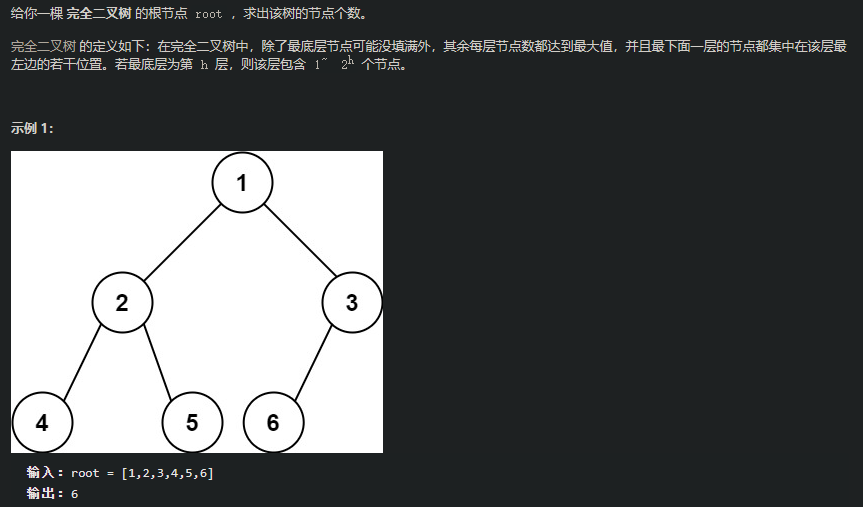

In [15]:
# 看是不是满二叉树，是的话直接用公式计算，不是的话递归
def lc222(root):
    if not root:return 0

    def traversal(node):
        if not node:
            return 0
        left = 0
        tmp = node

        while tmp.left:
            left += 1
            tmp = tmp.left

        right = 0
        tmp = node
        while tmp.right:
            right += 1
            tmp = tmp.right

        if left == right:
            return 2**(left+1) - 1
        else:
            return 1 + traversal(node.left) + traversal(node.right)

    return traversal(root)

### LC.513 [找树左下角的值](https://leetcode.cn/problems/find-bottom-left-tree-value/)
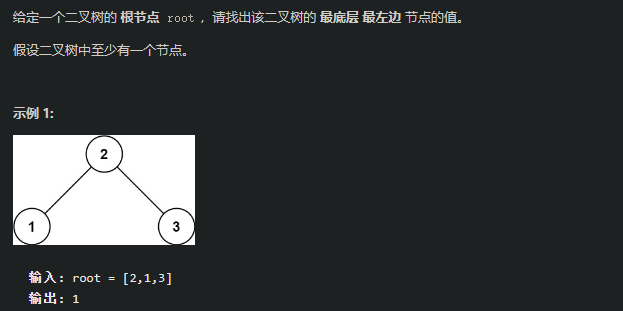
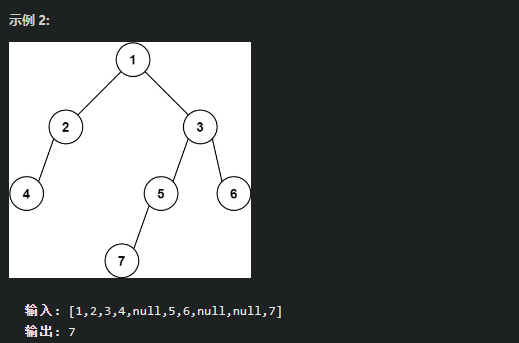

In [16]:
# 带着深度的递归，要用中-左-右才能找到最深节点的第一个左节点（这块不能错）
def lc513(root):
    ## 特殊情况
    if not root.left and not root.right:
        return root.val

    ## 递归：需要一个记录深度的变量
    maxdepth = 0
    res = -1

    def traversal(node,depth):
        nonlocal maxdepth,res
        if not node.left and not node.right and depth > maxdepth:
            maxdepth = depth
            res = node.val
        if node.left:
            traversal(node.left,depth+1)
        if node.right:
            traversal(node.right,depth+1)
    traversal(root,1)
    return res

### LC.236 [二叉树的最近公共祖先](https://leetcode.cn/problems/lowest-common-ancestor-of-a-binary-tree/)
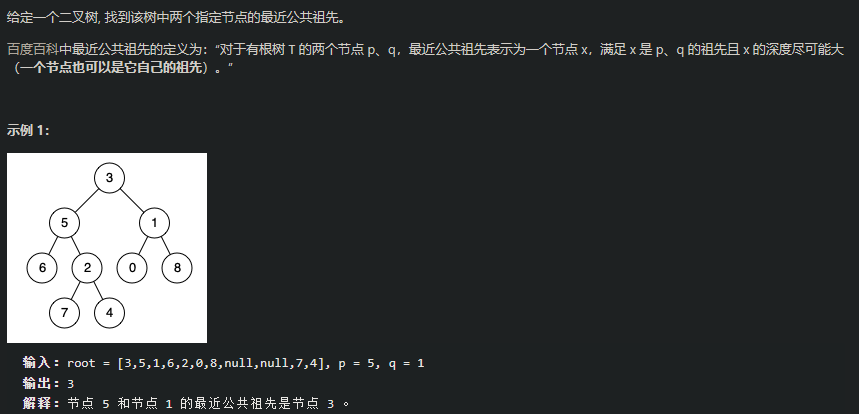

In [17]:
# 很巧妙的题，如果root等于p或者q的话，那么返回值，必然包括root本身，在递归考虑left和right，如果都不为None，就是root，否则就是不为None的子树
class lc236_:
    def lc236(self,root,p,q):
        if not root or p == root.val or q == root.val:
            return root
        left = self.lc236(root.left,p,q)
        right = self.lc236(root.right,p,q)
        
        if left and right:
            return root
        if left:
            return left
        if right:
            return right

#### ##########################################我是分界线#################################################

## 3. 二叉树的回溯相关
#### 其实可以放到递归里，但是还是按照有没有回溯过程分开了

### LC.111,LC.104(最小/最大深度二叉树) [最小深度二叉树](https://leetcode.cn/problems/minimum-depth-of-binary-tree/)
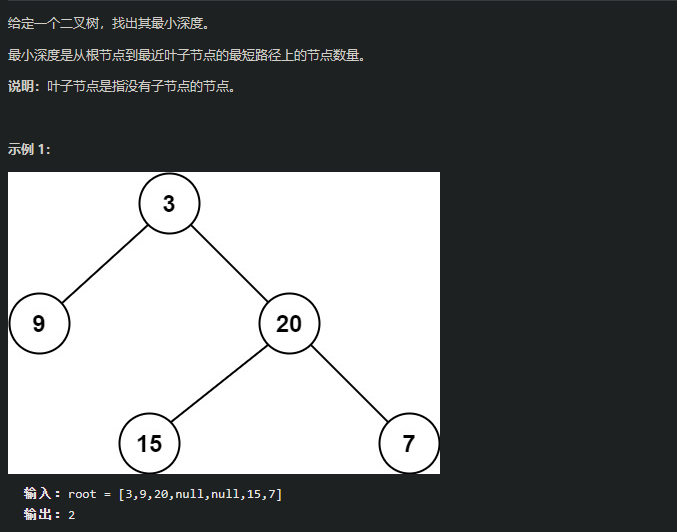

In [18]:
# 最大，最小二叉树采用统一的写法了，采用回溯写起来会两个会不同
def lc111(root):
    if not root:
        return 0
    depth = []
    path = [root.val]
    def traversal(node):
        # 叶子节点时计算一次depth
        if not node.left and not node.right:
            depth.append(len(path[:]))
            return

        if node.left:
            path.append(node.left.val)
            traversal(node.left)
            path.pop()
        if node.right:
            path.append(node.right.val)
            traversal(node.right)
            path.pop()

    traversal(root)
    print(depth)
    return min(depth)  # 最大深度就返回max(depth)

### LC.112 [路径总和](https://leetcode.cn/problems/path-sum/)
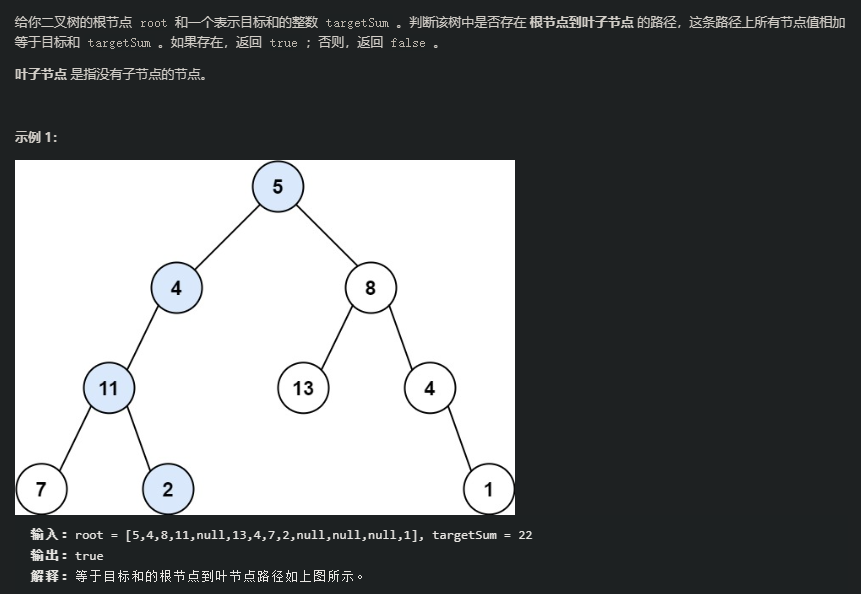

In [19]:
# 回溯思路，跟上一个差不多
def lc112(root,targetSum):
    if not root:
        return False
    depth = []
    path = [root.val]
    def traversal(node):
        # 叶子节点时计算一次depth
        if not node.left and not node.right:
            depth.append(sum(path[:]))
            return

        if node.left:
            path.append(node.left.val)
            traversal(node.left)
            path.pop()
        if node.right:
            path.append(node.right.val)
            traversal(node.right)
            path.pop()

    traversal(root)
    print(depth)
    return targetSum in depth 

### LC.437 [路径总和 III](https://leetcode.cn/problems/path-sum-iii/)
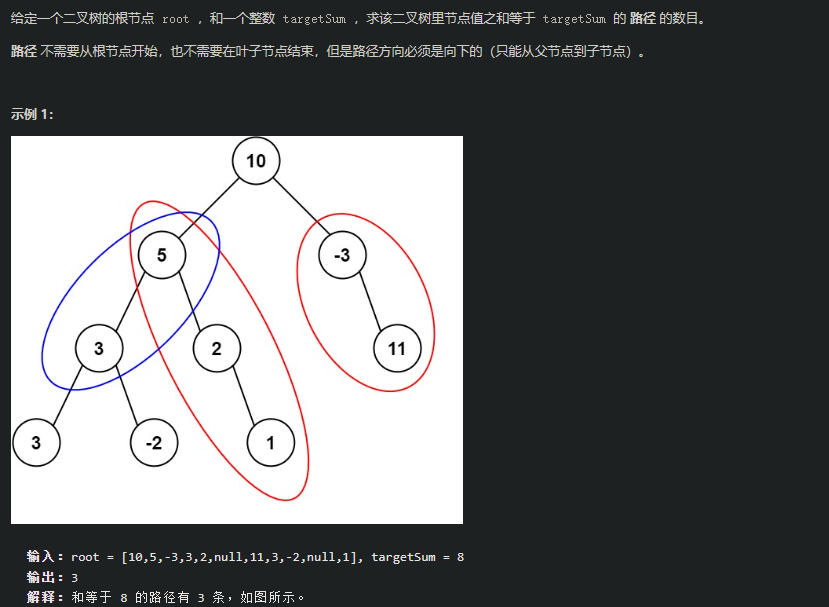

In [20]:
# 普通方法，将每个节点的情况全部遍历
def lc437(root):
    ## 找出以这个节点为根的所有路径总和
    def traversal(node,res,path):
        res.append(sum(path[:]))
        if not node: return 

        if node.left:
            path.append(node.left.val)
            traversal(node.left,res,path)
            path.pop()
        if node.right:
            path.append(node.right.val)
            traversal(node.right,res,path)
            path.pop()
        return res
    # print(traversal(root,[],[root.val]))

    ## 遍历每个节点
    result = 0
    def traversal2(node):
        nonlocal result
        if not node:return

        res = traversal(node,[],[node.val])
        # print(res,targetSum)
        if res:
            for i in res:
                if i == targetSum:
                    result += 1
        traversal2(node.left)
        traversal2(node.right)
    traversal2(root)
    return result

### LC.257 [二叉树的所有路径](https://leetcode.cn/problems/binary-tree-paths/)
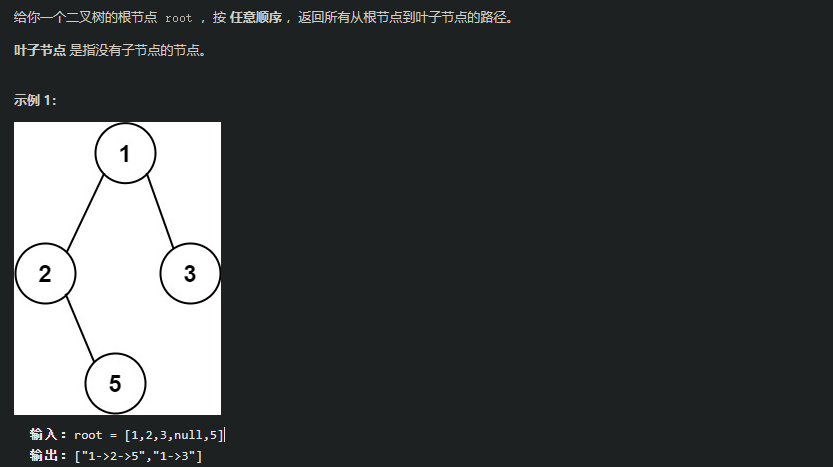

In [21]:
# 回溯
def lc257(root):
    if not root:
        return []
    path = [str(root.val)]
    res = []

    def traversal(node):
        if not node.left and not node.right:
            res.append(''.join(path[:]))
            return

        for i in [node.left,node.right]:
            if i:
                path.append('->')
                path.append(str(i.val))
                traversal(i)
                path.pop()
                path.pop()

    traversal(root)
    return res

#### ##########################################我是分界线#################################################

## 4. 二叉搜索树相关（BST）

### LC.700 [二叉搜索树中的搜索](https://leetcode.cn/problems/search-in-a-binary-search-tree/)
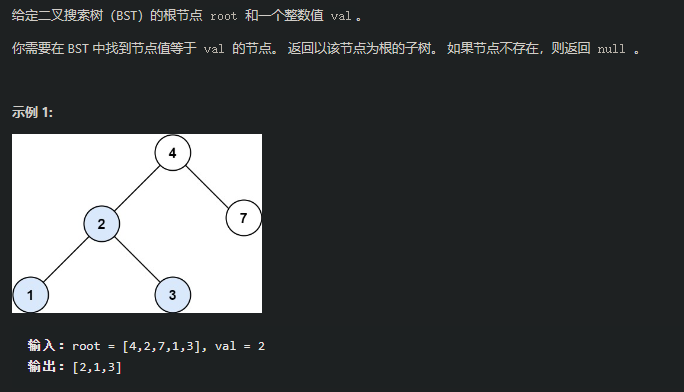

In [22]:
# 利用BST的特性，左子树比root.val小，右子树比root.val大，递归
class Solution:
    def lc700(self,root):
        if not root:return
        if val < root.val:
            return self.lc700(root.left,val)
        if val > root.val:
            return self.lc700(root.right,val)
        if val == root.val:
            return root

### LC.98 [验证二叉搜索树](https://leetcode.cn/problems/validate-binary-search-tree/)
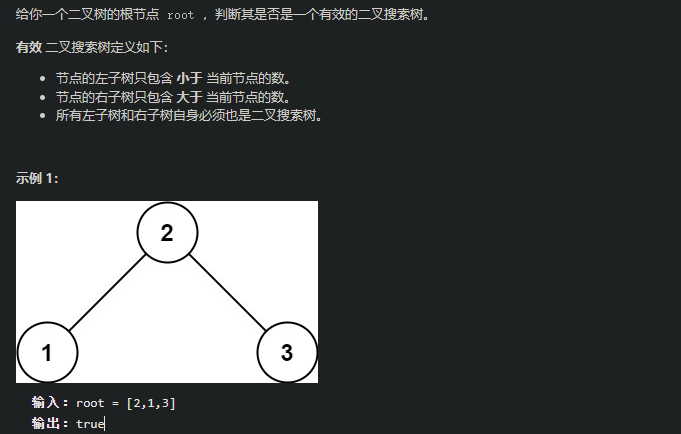

In [23]:
# 利用BST特性，中序遍历，应该是一个非递减的序列
def lc98(root):
    # 中序遍历看看是不是递增的
    result = []
    label = 0
    def traversal(node):
        nonlocal label
        if not node:
            return 

        traversal(node.left)
        result.append(node.val)
        if len(result)>1:
            if result[-1] <= result[-2]:
                label = 1
        traversal(node.right)

    traversal(root)
    # print(result)
    return label == 0

### LC.530 [二叉搜索树的最小绝对差](https://leetcode.cn/problems/minimum-absolute-difference-in-bst/)
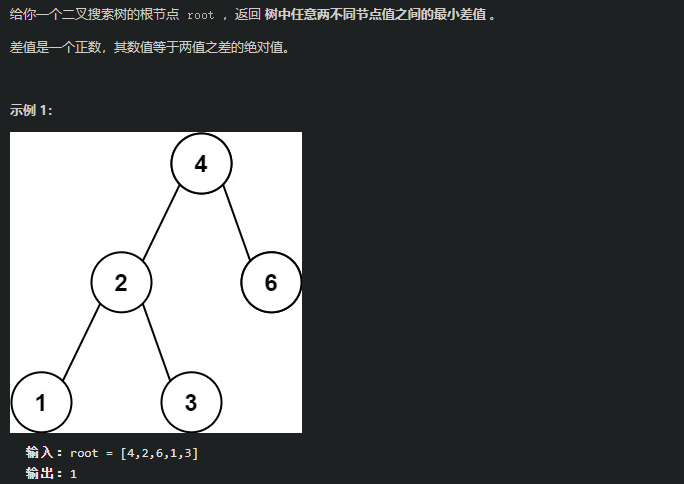

In [24]:
# 中序遍历，求相邻两个节点的距离
def lc530(root):
    min_num = 1e5  # 根据题目给的取值范围赋值的
    last = -1 * 1e5
    def traversal(node):
        nonlocal min_num,last
        if not node:
            return
        traversal(node.left)

        num = node.val - last
        last = node.val
        if num < min_num:
            min_num = num

        traversal(node.right)
    traversal(root)
    return min_num

### LC.501 [二叉搜索树的众数](https://leetcode.cn/problems/find-mode-in-binary-search-tree/)
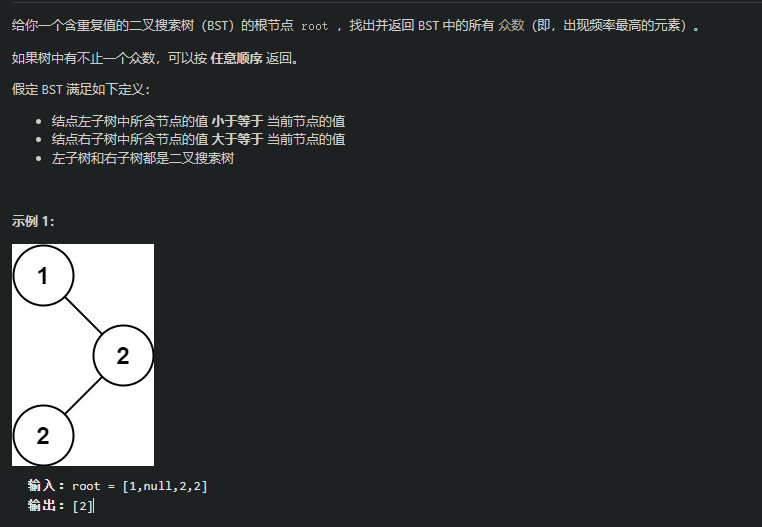

In [25]:
# 二叉搜索树，可以在中序遍历的过程中找到众数，有点麻烦
def lc504(root):
    res = [] # 保存结果
    num = 0  # 当前数字出现的字数
    max_num = 0 # 当前的众数
    last = 1e6 # 防止开始就相同

    def traversal(node):
        nonlocal num,max_num,last,res
        if not node:
            return

        traversal(node.left)

        if node.val == last:
            num += 1
            if num == max_num:
                res.append(node.val)
            if num > max_num:
                res = [node.val]
                max_num = num
        else:
            last = node.val
            num = 0  # 注意提前置0
            if num == max_num:  # 初始情况要考虑
                res.append(node.val)

        traversal(node.right)

    traversal(root)
    return res

### LC.235 [二叉搜索树的最大公共祖先](https://leetcode.cn/problems/lowest-common-ancestor-of-a-binary-search-tree/)
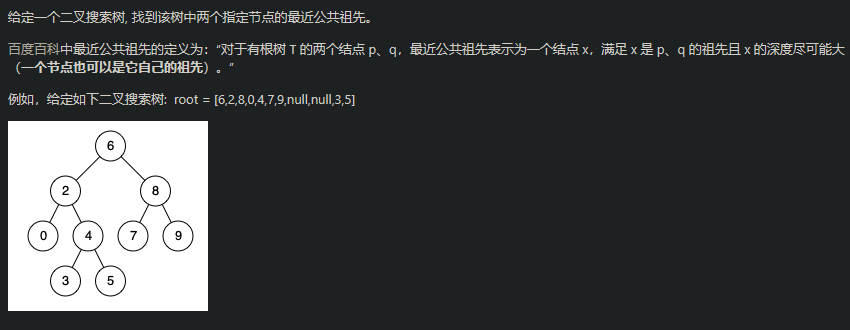

In [26]:
# 对比前面二叉树的最大公共祖先，BST可以依靠左子树小，右子树大来缩小范围
class lc235_:
    def lc235(self,root,p,q):
        if root.val < min(p,q):
            return self.lc235(root.right,p,q)
        if root.val > max(p,q):
            return self.lc235(root.left,p,q)
        
        # 如果root.val在[p,q]之间的话，那肯定返回值就是root…
        return root

### LC.701 [二叉搜索树的插入操作](https://leetcode.cn/problems/insert-into-a-binary-search-tree/)
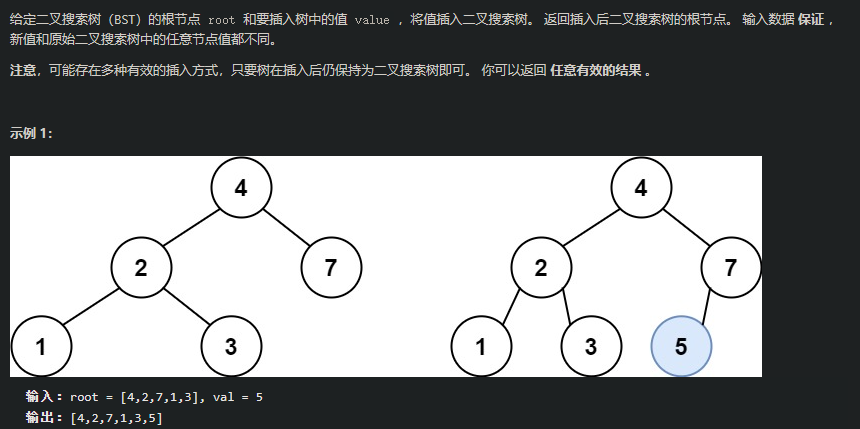

In [27]:
# 有很多种情况，这里只考虑插入到叶子节点
def lc701(root,val):
    def traversal(node):
        # 找到合适的叶子节点，就将val插入到这里
        if not node:
            return TreeNode(val)
        
        if val < root.val:
            root.left = traversal(node.left,val)
        if val > root.val:
            root.right = traversal(node.right,val)
        
        return root

### LC.450 [删除二叉搜索树中的节点](https://leetcode.cn/problems/delete-node-in-a-bst/)
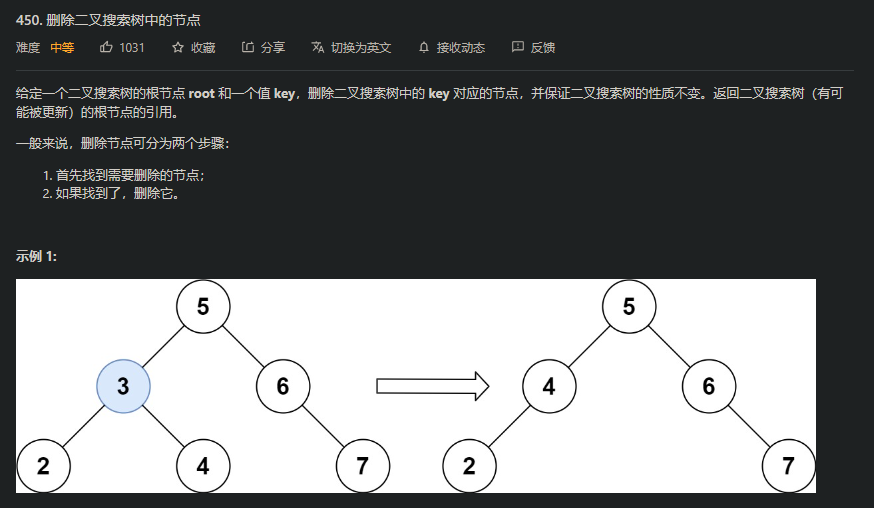

In [28]:
# 将删除节点的左子树插入到右节点的左下角，并将结果返回到原来的删除位置
class lc450_:
    def lc450(self,root,key):
        if not root:
            return None
    
        # 两种情况考虑
        if key > root.val:
            root.right = self.lc450(root.right,key)
        if key < root.val:
            root.left = self.lc450(root.left,key)

        # 一旦找到了要删除的点，相关操作
        if key == root.val:
            if not root.left and not root.right:
                return None
            if not root.left and root.right:
                return root.right
            if not root.right and root.left:
                return root.left
            # 最复杂的情况
            tmp = root.right
            while tmp.left:
                tmp = tmp.left
            tmp.left = root.left

            return root.right

        return root

### LC.669 [修剪二叉搜索树](https://leetcode.cn/problems/trim-a-binary-search-tree/)
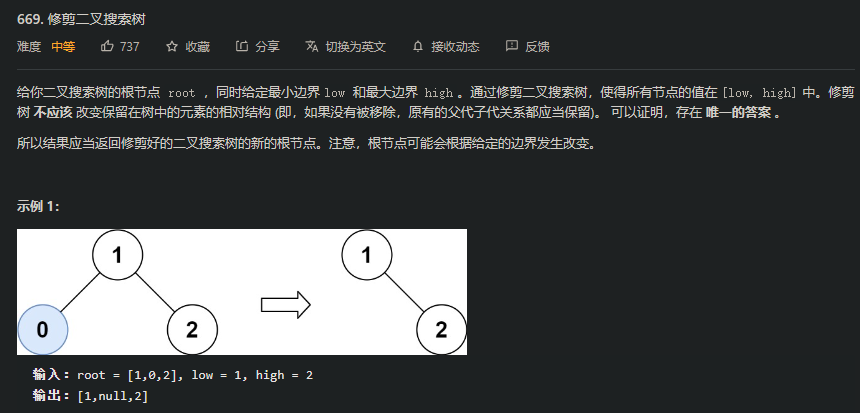
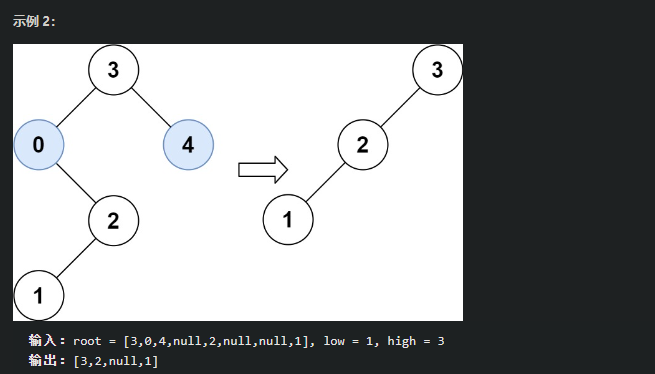

In [29]:
# 分情况讨论
### root.val < low : 左子树都不要了，直接返回lc(root.right)
### root.val > high : 右子树都不要了，直接返回lc(root.left)
### root.val在[low,high]之间，root节点肯定会保留，递归root.left和root.right 
class lc669_:
    def lc669(self,root,low,high):
        if not root:
            return None
        
        if root.val < low:
            return self.lc669(root.right,low,high)
        if root.val > high:
            return self.lc669(root.left,low,high)
        
        if low <= root.val <= high:
            root.left = self.lc669(root.left,low,high)
            root.right = self.lc669(root.right,low,high)
            return root

### LC.538 [把二叉树转换为累加树](https://leetcode.cn/problems/convert-bst-to-greater-tree/)
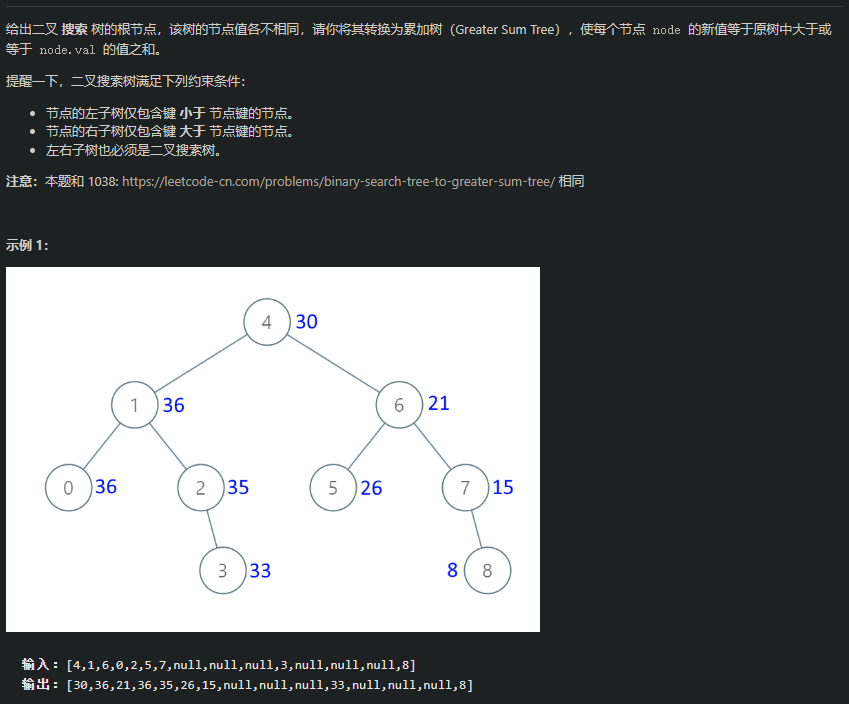

In [30]:
# 逆中序遍历，并保存上一个节点的累加值
def lc538(root):
    last,now = 0,0
    def traversal(node):
        nonlocal last,now
        if not node:
            return

        traversal(node.right)

        now += node.val
        node.val += last
        last = now

        traversal(node.left)

    traversal(root)
    return root

### LC.653 [两数之和 IV - 输入二叉搜索树](https://leetcode.cn/problems/two-sum-iv-input-is-a-bst/)
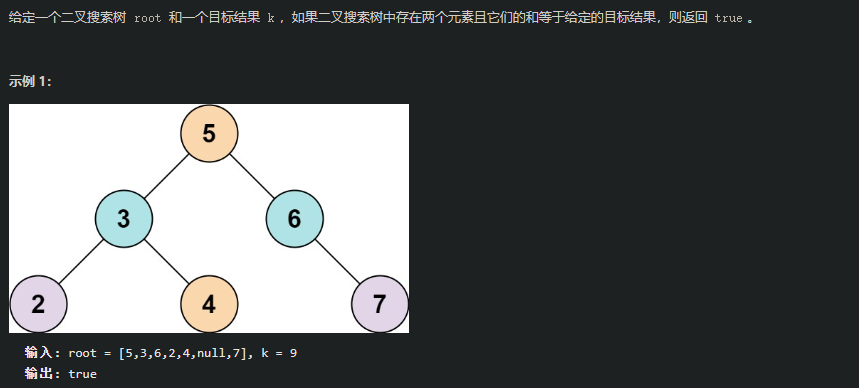

In [31]:
# BST+哈希
### 如果差值没在set里，那么直接将这个节点加到set里
def lc653(root,k):
    s = set()
    def traversal(node):
        if not node:
            return False

        left = traversal(node.left)

        if k - node.val not in s:
            s.add(node.val)
        else:
            return True

        right = traversal(node.right)

        return left or right

    return traversal(root)

#### ##########################################我是分界线#################################################

## 5. 二叉树的生成相关

#### 大题思路：
###### 1. 找root值
###### 2. root.left 和 root.right递归产生要的数据
###### 3. 递归产生叶子节点

### LC.106 [从中序与后序遍历序列构造二叉树](https://leetcode.cn/problems/construct-binary-tree-from-inorder-and-postorder-traversal/)
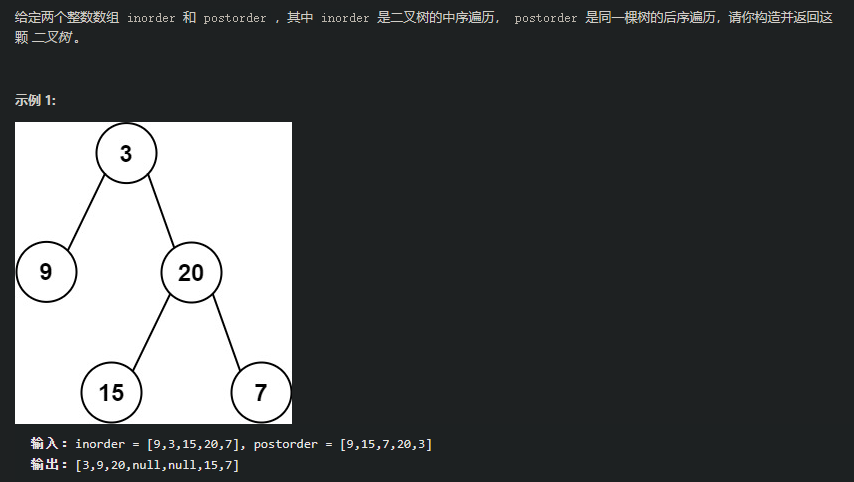

In [32]:
# 思路如上
def lc106(inorder,postorder):
    if inorder == []:
        return None
    root_value = postorder[-1]
    root_index = inorder.index(root_value)

    inorder_left = inorder[:root_index]
    inorder_right = inorder[root_index+1:]

    postorder_left = postorder[:len(inorder_left)]
    postorder_right = postorder[len(inorder_left):len(inorder_left)+len(inorder_right)]

    root = TreeNode(root_value)
    root.left = self.buildTree(inorder_left,postorder_left)
    root.right = self.buildTree(inorder_right,postorder_right)

    return root

### LC.654 [最大二叉树](https://leetcode.cn/problems/maximum-binary-tree/)
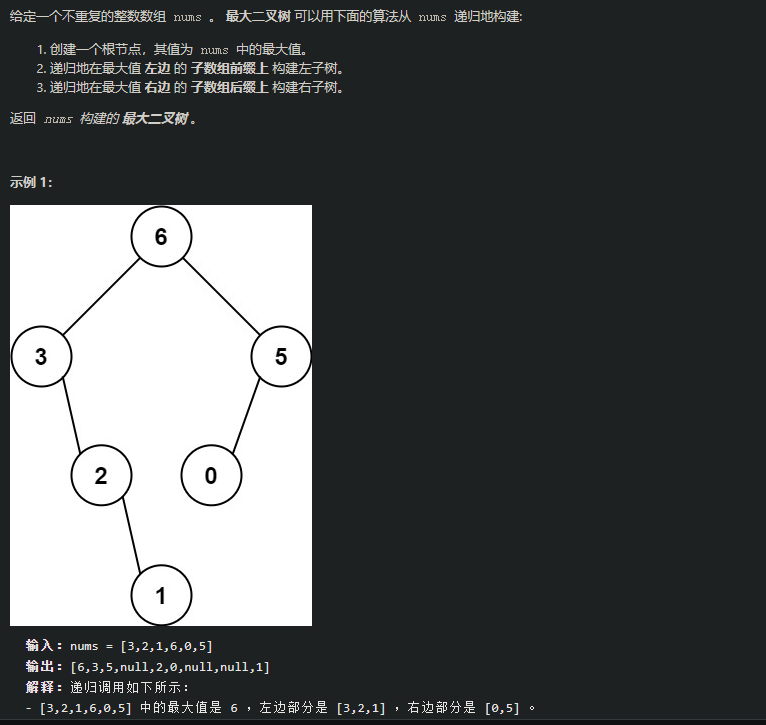

In [33]:
# 思路如上
def lc654(nums):
    if not nums:
        return None

    root_value = max(nums)
    root_index = nums.index(root_value)

    left_num = nums[:root_index]
    right_num = nums[root_index+1:]

    root = TreeNode(root_value)
    root.left = self.constructMaximumBinaryTree(left_num)
    root.right = self.constructMaximumBinaryTree(right_num)

    return root

### LC.108 [将有序数组转换为二叉搜索树](https://leetcode.cn/problems/convert-sorted-array-to-binary-search-tree/)
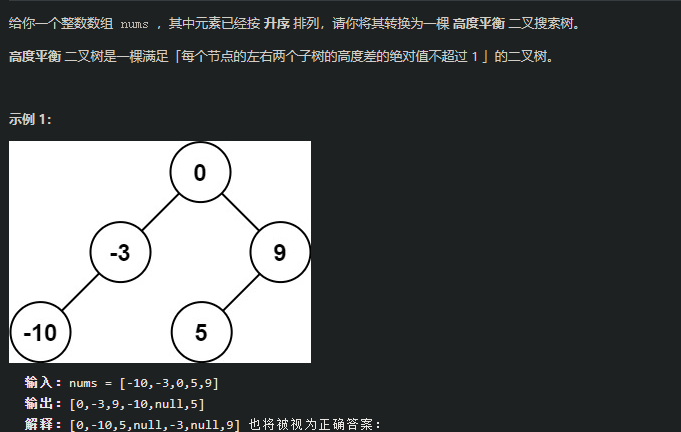

In [34]:
# 区别在于找中点作为root
def lc108(nums):
    if not nums:
        return None
    root_value = nums[len(nums)//2]
    root_index = nums.index(root_value)

    nums_left = nums[:root_index]
    nums_right = nums[root_index+1:]

    root = TreeNode(val=root_value)
    root.left = self.sortedArrayToBST(nums_left)
    root.right = self.sortedArrayToBST(nums_right)

    return root

### LC.109 [有序链表转换二叉搜索树](https://leetcode.cn/problems/convert-sorted-list-to-binary-search-tree/description/)
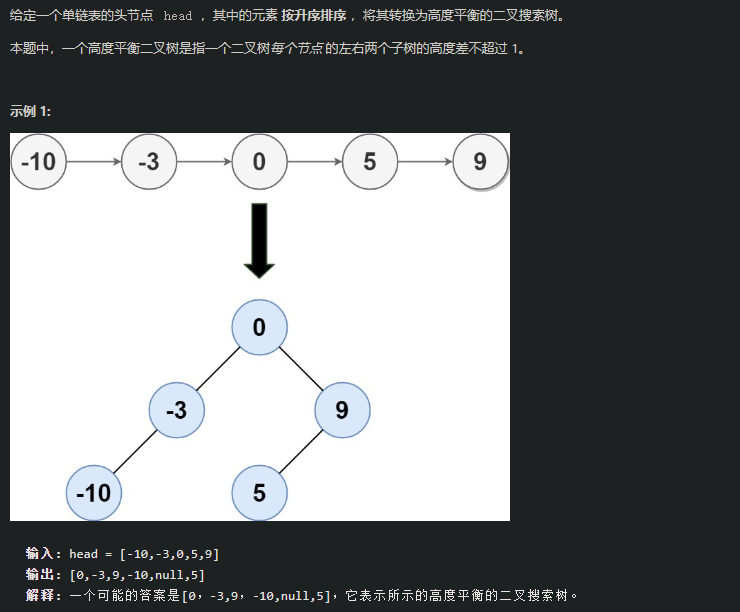

In [35]:
# 区别在于如何遍历和切分链表
def lc109(head):
    length = 0
    head1 = head
    while head1:
        length += 1
        head1 = head1.next
    if length == 0:
        return None

    root_index = length // 2
    root_value = 0

    left_head,right_head = ListNode(),ListNode()
    left,right = left_head,right_head

    # 寻找left
    while root_index > 0:
        left.next = ListNode(head.val)   # 找下一次递归用到的链表：使用一个一个加
        left = left.next
        head = head.next
        root_index -= 1

    # 寻找root
    root_value = head.val
    head = head.next
    
    # 寻找right
    while head:
        right.next = ListNode(head.val)
        right = right.next
        head = head.next

    root = TreeNode(root_value)
    root.left = self.sortedListToBST(left_head.next)
    root.right = self.sortedListToBST(right_head.next)

    return root

#### ##########################################我是分界线#################################################

## 6. 前缀树相关（待补充）